# Linear Models for Classification
* `Introduction to Machine Learning` by Andreas Mueller and Sarah Guido
* Chapter 2: Supervised Learning 

### Algorithms for Linear Models differ in following two ways:
* Way they measure how well a particular combination of coefficients and intercepts fits training data
* If and what kind of regularization is used

# Logistic Classification of Opioid Pain Medication
* Decision boundary is a linear function of the input
* Binary linear classifier separates two classes using a line, plane, or hyperplane
* Implemented in `linear_model.logisticRegression`

### Import packages
* Load forge dataset and assign variables

In [1]:
import sklearn
import mglearn

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

### Figure 1. Decision boundaries of linear SVM and logistic regresison on forge data with default parameters
* Any new data point above decision boundary classified as 1, any points below classified as 2
* Both models apply L2 regularization by default, same way as Ridge regression
* Foth both models C is tradeoff parameter that determines the strength of regularization

## Regularization Parameter C
#### High values of C: 
* Correspond to less regularization, models will fit training set as best as possible
* Stresses importance of each individual data point to be classified correctly

#### Low values of C: 
* Models put more emphasis on finding coefficient vector (w) close to zero
* Cause models to try to adjust to the 'majority' of data points

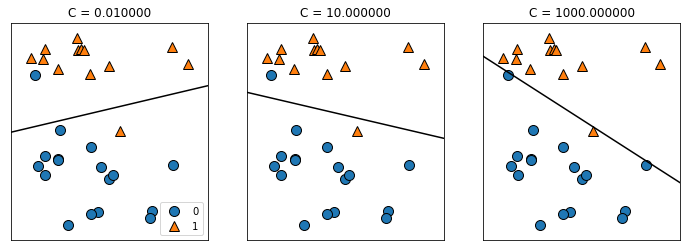

In [2]:
mglearn.plots.plot_linear_svc_regularization()

### Figure 2. 
* Left panel: Small values of C gives lots of regularization, two misclassified points
* Middle panel: Moderate C, model focuses on misclassified points, tilts decision boundary 
#### (Right panel) for High C:
    * Model tries to correctly classify all points correctly with a straight line
    * But may not capture overall layout of classes well. Model is likely OVERFITTING! 
    * Decision bounday is titled a lot; all points in class 0 are correctly classified.

## Linear Models of Classification
### Low Dimensional spaces
* Linear model for classification may seems restrictive in low-dimensional space
* Only allowing for decision boundaries that are straight lines or planes

### High Dimensional spaces
* Linear models for classification become very powerful
* Guarding against OVERFITTING becomes important when considering many features

## Classify HEROINEVR from Opioid features
* Load WI Breast Cancer study data
* Show features
* Visualize dataset

In [3]:
file = pd.read_csv('project-data.csv')
opioids = pd.DataFrame(file)
opioids.drop(opioids.columns[[0,1]], axis=1, inplace=True)
del opioids['SUICATT']

In [4]:
print(opioids.keys())

Index(['AGECAT', 'SEX', 'MARRIED', 'EDUCAT', 'EMPLOY18', 'CTYMETRO', 'HEALTH',
       'MENTHLTH', 'PRLMISEVR', 'PRLMISAB', 'PRLANY', 'HEROINEVR', 'HEROINUSE',
       'HEROINFQY', 'TRQLZRS', 'SEDATVS', 'COCAINE', 'AMPHETMN', 'TRTMENT',
       'MHTRTMT'],
      dtype='object')


In [5]:
opioids.describe()

,AGECAT,SEX,MARRIED,EDUCAT,EMPLOY18,CTYMETRO,HEALTH,MENTHLTH,PRLMISEVR,PRLMISAB,PRLANY,HEROINEVR,HEROINUSE,HEROINFQY,TRQLZRS,SEDATVS,COCAINE,AMPHETMN,TRTMENT,MHTRTMT
count,57146.000000,57146.000000,57146.000000,57146.000000,57146.000000,57146.000000,57146.000000,57146.000000,57146.000000,57146.00000,57146.000000,57146.000000,57146.000000,57146.000000,57146.00000,57146.000000,57146.000000,57146.000000,57146.000000,57146.000000
mean,2.771743,0.532146,1.976219,3.052270,0.898786,2.236325,2.280020,0.176950,0.110996,0.58263,0.441396,0.016729,0.030658,0.400938,0.22656,0.050940,0.177510,0.124348,0.035873,0.062367
std,1.400627,0.498970,1.487020,1.442398,0.931240,0.772090,1.004523,0.520213,0.314130,2.00942,0.982765,0.128256,0.260850,9.778014,0.72891,0.325398,0.555303,0.396025,0.185975,0.278608
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,2.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,1.000000,4.000000,4.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1.000000,4.000000,5.000000,2.000000,3.000000,5.000000,2.000000,1.000000,17.00000,10.000000,1.000000,5.000000,365.000000,5.00000,5.000000,5.000000,4.000000,1.000000,5.000000


In [6]:
opioids['HEROINEVR'].value_counts()

0    56190
1      956
Name: HEROINEVR, dtype: int64

In [7]:
opioids['PRLMISEVR'].value_counts()

0    50803
1     6343
Name: PRLMISEVR, dtype: int64

In [8]:
features = ['AGECAT', 'SEX', 'MARRIED', 'EDUCAT','EMPLOY18',
            'CTYMETRO', 'HEALTH','MENTHLTH', 'HEROINEVR', 
            'HEROINUSE','HEROINFQY', 'TRQLZRS','SEDATVS', 
            'COCAINE', 'AMPHETMN', 'TRTMENT','MHTRTMT']

In [9]:
type(opioids)

pandas.core.frame.DataFrame

In [10]:
opioids.shape

(57146, 20)

In [11]:
opioids.data = pd.DataFrame(opioids, columns=['AGECAT', 'SEX', 'MARRIED', 'EDUCAT','EMPLOY18',
                                              'CTYMETRO', 'HEALTH','MENTHLTH', 'HEROINEVR', 
                                              'HEROINUSE','HEROINFQY', 'TRQLZRS','SEDATVS', 
                                              'COCAINE', 'AMPHETMN', 'TRTMENT','MHTRTMT'])
opioids.target = opioids['PRLMISEVR']

In [12]:
opioids.data.head()

,AGECAT,SEX,MARRIED,EDUCAT,EMPLOY18,CTYMETRO,HEALTH,MENTHLTH,HEROINEVR,HEROINUSE,HEROINFQY,TRQLZRS,SEDATVS,COCAINE,AMPHETMN,TRTMENT,MHTRTMT
0,1,0,1.0,1,0.0,1,2.0,0.0,0,0,0.0,0,0,0,0,0.0,0.0
1,4,0,2.0,3,2.0,2,1.0,0.0,0,0,0.0,0,0,2,0,1.0,0.0
2,3,1,1.0,5,0.0,1,2.0,0.0,0,0,0.0,2,0,0,0,0.0,1.0
3,1,1,0.0,1,0.0,2,3.0,0.0,0,0,0.0,0,0,0,0,0.0,0.0
4,2,1,4.0,4,0.0,1,4.0,0.0,0,0,0.0,0,0,0,0,0.0,1.0


## Logistic Regression: Cancer Data
* Split data into TRAIN and TEST sets
* Fit the model on Training data
* Evaluate model on Text data

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    opioids.data, opioids.target, stratify=opioids.target, random_state=42)

In [14]:
logreg = LogisticRegression().fit(X_train, y_train)

In [15]:
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.901
Test set score: 0.903


### Regularization Parameter settings 
* Default setting `C=1` provides good performance for train and test sets
* Very likely UNDERFITTING 

### Use higher value of C to fit more 'flexible' model
* C=100 gives higher training set accuracy and slightly higher Test set accuracy
* More complex model (flexible) performs better

In [16]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.901
Test set score: 0.903


### Use lower value of C to fit more 'regularized' model
* Setting C=0.01 leads model to try to adjust to 'majority' of data points
* Decreased model accuracy for both training and Test sets

In [17]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.901
Test set score: 0.904


## Plot Coefficients of Logistic Regression for different values of C
* By default `LogisticRegression` applies L2 regularization similar to `Ridge` regression
* Stronger regularization pushes coefficients closer to zero
* Parameter values can influence values of Coefficients

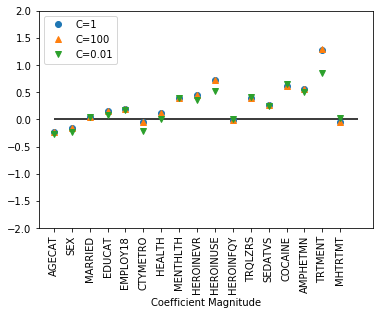

In [18]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")

plt.xticks(range(opioids.data.shape[1]), features, rotation=90)
plt.hlines(0,0, opioids.data.shape[1])
plt.ylim(-2, 2)

plt.xlabel("Coefficient Index")
plt.xlabel("Coefficient Magnitude")
plt.legend()

## Creating More Interpretable Model: L1 Regularization (Lasso)
* `L1` regularization (Lasso) limits values of most coefficients to zero
*  Model is limited to using only a few features

Training accuracy of L1 logreg with C=0.010: 0.90
Test accuracy of L1 logreg with C=0.010: 0.90
Training accuracy of L1 logreg with C=1.000: 0.90
Test accuracy of L1 logreg with C=1.000: 0.90
Training accuracy of L1 logreg with C=100.000: 0.90
Test accuracy of L1 logreg with C=100.000: 0.90


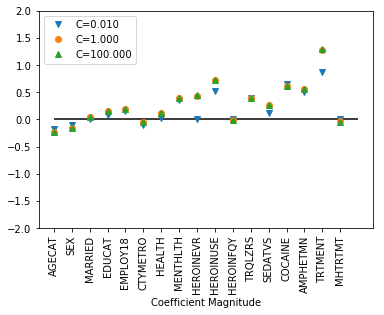

In [19]:
for C, marker in zip([0.01, 1, 100], ['v', 'o', '^']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of L1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of L1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(opioids.data.shape[1]), features, rotation=90)
plt.hlines(0,0, opioids.data.shape[1])
plt.xlabel("Coefficient Index")
plt.xlabel("Coefficient Magnitude")

plt.ylim(-2, 2)
plt.legend()

## Penalty Parameter (L) and Linear Classification Models
* Main difference between linear models for classification is penalty parameter
* L2 (Ridge) penalty uses all available features, regularization C pushes toward zero 
* L2 (Lasso) penalty sets coefficients for most features to zero, uses only a subset
    * Improved interpretability with L2 penalty (Lasso)